## Math Tools
This notebook is a collection of linear algebra/differential equations functions/solvers that I implemented as a personal challenge. After completing a linear algebra course during the Spring 2025 semester, I decided to reinforce what I learned by translating what I learned in the LA/Diff. Eq. course into Python.

Each section includes a mathematical summary, followed by a coded implementation and example usage.

This project is meant to reflect my growth in both mathematics and programming, and to serve as a foundation for my future work in data science, engineering, and machine learning.

In [2]:
from sympy import symbols, sympify
import matplotlib.pyplot as plt
import numpy as np
from sympy import solve, Eq, Matrix, symbols, det, exp, I

<h3>Forward Euler Method (FEM)</h3>

Forward Euler Method, or more commonly known as Euler's Method, is an algorithm used to approximate solutions to ordinary differential equations (ODEs).

In [6]:
def function_cleanse(f):
    """
    RETURNS THE ODE
    JUST WITH X TERMS
    f : Function in terms of y and x (string)
    RETURNS A SYMPIFY FORMULA 
    """
    x = symbols("x")
    y = symbols("y")
    if "=" in f:
        if "dy/dx" not in f:
            raise SyntaxError("Incorrect function syntax!")
        else:
            pass
    f = sympify([x for x in f.split("=") if "d" not in x][0]) 
    return f
    
def forward_eulers_method(f, d, start_y, start_x, end_x):
    """
    forward_eulers_method : Forward Euler's Method
    APPROXIMATES THE VALUE OF A
    FUNCTION (SOLUTION TO AN ODE) AT A POINT
    REQUIRES FROM SYMPY IMPORT SYMBOLS, SYMPIFY
    f : ODE in terms of y and x (string)
    d : Step size (scalar)
    start_y : Starting y-value (scalar)
    start_x : Starting x-value (scalar)
    end_x : Desired x-value (scalar)
    RETURNS A FLOAT
    """
    if not ((end_x-start_x)/d).is_integer():
        raise ValueError("The step size is incompatiable! Try again with a different step size (d)!")
    iters = int((end_x-start_x)/d)
    f = function_cleanse(f)
    x = symbols("x")
    y = symbols("y")
    x_val = 0
    y_n = 0
    history_dict = {}
    for i in range(iters):
        if i == 0:
            y_n = start_y
            history_dict[i] = y_n
            x_val = start_x
            dfdx = f.subs(x, x_val).subs(y,y_n).evalf()
            y_n1 = y_n + (d*dfdx)
            x_val += d
            y_n = y_n1
            history_dict[i+1] = y_n
        else:
            dfdx = f.subs(x, x_val).subs(y,y_n).evalf()
            y_n1 = y_n + (d*dfdx)
            x_val += d
            y_n = y_n1
            history_dict[i+1] = y_n
    
    print(f"Forward Euler's Method with the function: {f}\n"
          f"Initial x-value: {start_x}\n"
          f"Initial y-value: {start_y}\n"
          f"Step size: {d}\n"
          f"The value of y at {end_x} is approximately {y_n:.10f}")

    return y_n, history_dict
    
            
    

In [7]:
result = forward_eulers_method("y*x", .0001, 1, 0, 1)

Forward Euler's Method with the function: x*y
Initial x-value: 0
Initial y-value: 1
Step size: 0.0001
The value of y at 1 is approximately 1.6486113651


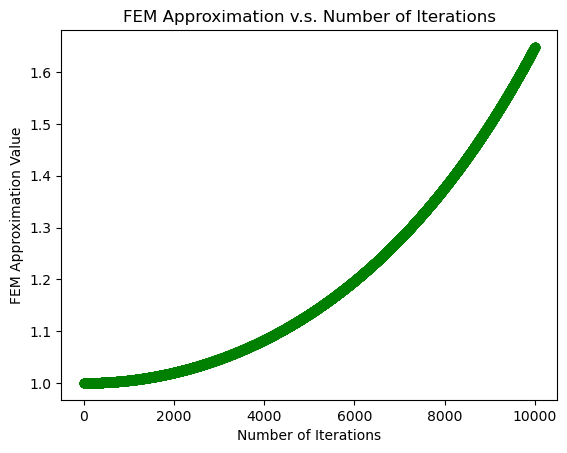

In [8]:
# Plot of Forward Euler Method v.s. Number of Iterations
ind_var = list(result[1].keys())
dep_var = list(result[1].values())
fig, ax = plt.subplots()
ax.plot(ind_var,dep_var, marker = "o", color = "green")
ax.set_title("FEM Approximation v.s. Number of Iterations")
ax.set_xlabel("Number of Iterations")
ax.set_ylabel("FEM Approximation Value")
plt.show()

<h3>RK2 Method</h3>

The Runge-Kutta 2nd Order Method (a.k.a RK2) is another algorithm for approximating solutions to ODEs. RK2 combines both Forward Euler Method and Backward Euler Method (implicitly through approximation), allowing for a more accurate solution approximation.

In [9]:
def rk2(f, d, start_y, start_x, end_x):
    """
    rk2 : Runge-Kutta 2nd Order Method
    APPROXIMATES THE VALUE OF A
    FUNCTION (SOLUTION TO AN ODE) AT A POINT
    REQUIRES FROM SYMPY IMPORT SYMBOLS, SYMPIFY
    f : ODE in terms of y and x (string)
    d : Step size (scalar)
    start_y : Starting y-value (scalar)
    start_x : Starting x-value (scalar)
    end_x : Desired x-value (scalar)
    RETURNS A FLOAT
    """
    if not ((end_x-start_x)/d).is_integer():
        raise ValueError("The step size is incompatiable! Try again with a different step size (d)!")
    iters = int((end_x-start_x) / d)
    f = function_cleanse(f)
    x = symbols("x")
    y = symbols("y")
    
    for i in range(iters):
        if i == 0:
            y_n = start_y
            x_val = start_x
            k1 = f.subs(x, x_val).subs(y, y_n).evalf()
            k2 = f.subs(y, y_n + (d*k1)).subs(x, x_val + d).evalf()
            y_n1 = y_n + (.5 * d * (k1 + k2))
            x_val += d
            y_n = y_n1
        else:
            k1 = f.subs(x, x_val).subs(y, y_n).evalf()
            k2 = f.subs(y, y_n + (d*k1)).subs(x, x_val + d).evalf()
            y_n1 = y_n + (.5 * d * (k1 + k2))
            x_val += d
            y_n = y_n1

    print(f"Runge-Kutta 2nd Order Method with the function: {f}\n"
          f"Initial x-value: {start_x}\n"
          f"Initial y-value: {start_y}\n"
          f"Step size: {d}\n"
          f"The value of y at {end_x} is approximately {y_n:.10f}")
    
    return y_n

In [10]:
result = rk2("dy/dx=y*x", .0001, 1, 0, 1)

Runge-Kutta 2nd Order Method with the function: x*y
Initial x-value: 0
Initial y-value: 1
Step size: 0.0001
The value of y at 1 is approximately 1.6487212700


<h3>Determinant Solver</h3>

In Linear Algebra and many other applications, the determinant of a square matrix is an important concept that describes various matrix properties (e.g. invertibility, rank, linear independence, scaling, etc.).

In [14]:
def determinant(array):
    """
    FINDS THE DETERMINANT OF
    A 2D ARRAY
    REQUIRES NUMPY AS NP
    USES 1ST ROW COFACTOR EXPANSION
    array : a 2D array (matrix)
    RETURNS A FLOAT
    """
    r,c = array.shape
    if not r == c:
        raise ValueError("Not a square matrix! Determinant is not defined!") 
    detr = 0
    if r >= 3:
        for j in range(c):
            if j % 2 == 0:
                a = array[0][j]
            else:
                a = -1 * array[0][j]
            sm = np.delete(array, 0, axis=0)
            sm = np.delete(sm, j, axis=1)
            detr += determinant(sm) * a
            
        
    else:
        detr += (array[0][0] * array[1][1] - array[0][1] * array[1][0])

    return detr

In [15]:
# Function test: function v.s. built-in NumPy function
a = np.array([[0.548813, 0.71518937, 0.60276338],
 [0.54488318, 0.4236548,  0.64589411],
 [0.43758721, 0.891773, 0.96366276]])
x = determinant(a)
y = np.linalg.det(a)
print(x)
print(y)

-0.08430322114252414
-0.08430322114252418


In [16]:
def determinant_any_row(array, row):
    """
    FINDS THE DETERMINANT OF
    A 2D ARRAY
    USES ith ROW COFACTOR EXPANSION
    REQUIRES NUMPY AS NP
    array : a 2D array (matrix)
    row* : desired row (scalar)
    RETURNS A FLOAT
    
    *Uses Linear Algebra indexing
    for rows (starting from 1)
    
    """
    r,c = array.shape
    if not r == c:
        raise ValueError("Not a square matrix! Determinant is not defined!")
    if not row in range(1, r+1):
        raise ValueError("Row value is does not reflect the number of rows in the matrix!")
    detr = 0
    if r >= 3:
        for j in range(c):
            if (j + (row-1)) % 2 == 0:
                a = array[row-1][j]
            else:
                a = -1 * array[row-1][j]
            sm = np.delete(array, row-1, axis=0)
            sm = np.delete(sm, j, axis=1)
            detr += determinant(sm) * a
            
        
    else:
        detr += (array[0][0] * array[1][1] - array[0][1] * array[1][0])

    return detr

In [17]:
# Function test: function v.s. built-in NumPy function
matrix_5x5 = np.array([[0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864],
 [0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258],
 [0.02058449, 0.96990985, 0.83244264, 0.21233911, 0.18182497],
 [0.18340451, 0.30424224, 0.52475643, 0.43194502, 0.29122914],
 [0.61185289, 0.13949386, 0.29214465, 0.36636184, 0.45606998]])
x = determinant_any_row(matrix_5x5, 5)
y = np.linalg.det(matrix_5x5)
print(x)
print(y)

-0.00010345992074035134
-0.0001034599207403602


<h3>Linear System Solver</h3>

A general, linear, 2nd order or greater ODE can be written as a system of 1st order equations. This function takes a 2nd order, homogenous ODE (Ax = x') and splits the ODE into 2, 1st order equations where the homogeneous solution x_h is returned.

In [18]:
def linear_system_solver_2x2(A):
    """
    linear_system_solver_2x2 : Linear System Solver
    FINDS THE VECTOR X THAT SOLVES
    THE GENERAL EQUATION AX = X'
    REQUIRES NUMPY AS NP,
    FROM SYMPY IMPORT SOLVE, EQ,
    MATRIX, SYMBOLS, DET, EXP I
    A : 2x2 matrix (array)
    RETURNS A DICTIONARY
    DESCRIBING X1 and X2
    WHERE XH = X1 + X2,
    PRINTS XH
    """
    r, c = A.shape
    if not r == c == 2:
        raise ValueError("Input is not a 2 x 2 matrix!")
    
    λ = symbols("λ")
    t = symbols("t")
    c1 = symbols("c1")
    c2 = symbols("c2")

    
    A = Matrix(A)
    I_matrix = Matrix.eye(r)
    A_minus_lambda_I = A - (λ * I_matrix)
    detr = A_minus_lambda_I.det()
    eq = Eq(detr, 0)
    λ = solve(eq)
    
    if len(λ) == 2:
        vectors = np.empty((0,2), dtype=float)
        for val in λ:
            v1 = symbols("v1")
            v2 = symbols("v2")
    
            m = A - (val * I_matrix)
            eq = ((m[0,0] * v1) + (m[0,1] * v2)).subs(v1,1)
            v2 = solve(Eq(eq, 0))[0]
            v = np.array([1, v2])
            vectors = np.vstack([vectors, v])
    
        x_h = {"x1": list(c1 * vectors[0] * exp(λ[0] * t)) , "x2": list(c2 * vectors[1] * exp(λ[1] * t))}
        print("The homogeneous solution to the equation Ax = x' is:")
        print(f"x_h = c1 * {vectors[0]} * {exp(λ[0] * t)} + c2 * {vectors[1]} * {exp(λ[1] * t)}")
        
        return x_h
        
    else:
        vectors = np.empty((0,2), dtype=float)
        val = λ[0]
        v1 = symbols("v1")
        v2 = symbols("v2")
        w1 = symbols("w1")
        w2 = symbols("w2")
    
        m = A - (val * I_matrix)
        eq = ((m[0,0] * v1) + (m[0,1] * v2)).subs(v1,1)
        v2 = solve(Eq(eq, 0))[0]
        v = np.array([1, v2])
        vectors = np.vstack([vectors, v])

        w = solve(Eq(((m[0,0] * w1) + (m[0,1] * w2)).subs(w1,1),v[0]))[0]
        w = np.array([1, w])
        vectors = np.vstack([vectors, w])

        x_h = {"x1": list(c1 * vectors[0] * exp(λ[0] * t)) , "x2": list(c2 * (t * vectors[0] * exp(λ[0] * t) + vectors[1] * exp(λ[0] * t)))}
        print("The homogeneous solution to the equation Ax = x' is:")
        print(f"x_h = (c1 * {vectors[0]} * {exp(λ[0] * t)}) + c2(t * {vectors[0]} * {exp(λ[0] * t)} + {vectors[1]} * {exp(λ[0] * t)})")

        return x_h
    


In [19]:
# Function test
result = linear_system_solver_2x2(np.array([[0,-1],[1,0]]))

The homogeneous solution to the equation Ax = x' is:
x_h = c1 * [1 I] * exp(-I*t) + c2 * [1 -I] * exp(I*t)
